In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

## 1. Summary statistics of all the defects

In [43]:
df = pd.read_csv('defect_3500.csv')
df.describe()

# 25% quantile defWidth = 0.011135
width_small = 0.011135

### 3D MODEL

In [250]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df2 = pd.read_csv('3D_model_prediction_results.csv')

df_summary = df2.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary

,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.013096,0.003840,0.068311,0.930092,1.482955
std,0.017336,0.004864,0.004339,0.093659,0.089848
min,0.000040,0.000017,0.061205,0.619223,1.202511
25%,0.000322,0.000145,0.065324,0.862677,1.423687
50%,0.004302,0.001314,0.067107,0.955005,1.482734
75%,0.021620,0.006658,0.070113,1.000000,1.545519
max,0.089354,0.024334,0.091812,1.262577,1.910013


In [255]:
0.013096/0.012138 *100

107.89256879222278

### 2D MODEL

In [3]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df2 = pd.read_csv('Model_prediction_evaluation/2D_model_prediction_results_5.csv')

df_summary2 = df2.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary2


,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.012138,0.003588,0.068311,0.925748,1.482955
std,0.016539,0.004734,0.004339,0.093998,0.089848
min,0.000013,0.000002,0.061205,0.617958,1.202511
25%,0.000106,0.000053,0.065324,0.856828,1.423687
50%,0.002904,0.001009,0.067107,0.948846,1.482734
75%,0.020384,0.006283,0.070113,1.000000,1.545519
max,0.092477,0.022727,0.091812,1.329894,1.910013


In [2]:
df = pd.read_csv('Model_prediction_evaluation/2D_model_prediction_results.csv')

df_summary = df.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary

,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.012138,0.003588,0.068311,0.925748,1.482955
std,0.016539,0.004734,0.004339,0.093998,0.089848
min,0.000013,0.000002,0.061205,0.617958,1.202511
25%,0.000106,0.000053,0.065324,0.856828,1.423687
50%,0.002904,0.001009,0.067107,0.948846,1.482734
75%,0.020384,0.006283,0.070113,1.000000,1.545519
max,0.092477,0.022727,0.091812,1.329894,1.910013


In [109]:
df_summary.loc['mean']

MSE                        0.012138
MSE_modified               0.003588
MSE_modified_das           0.068311
MSE_modified_defect        0.925748
MSE_modified_defect_DAS    1.482955
Name: mean, dtype: float64

In [253]:
df_summary.MSE

count    1050.000000
mean        0.012138
std         0.016539
min         0.000013
25%         0.000106
50%         0.002904
75%         0.020384
max         0.092477
Name: MSE, dtype: float64

In [190]:
# df[round(df.MSE, 6) == round(df_summary.MSE['25%'], 6)]
df[round(df.MSE_modified, 5) == round(df_summary.MSE_modified['25%'], 5)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
20,2471.0,0.056484,0.001,0.001273,0.021077,-4.155425,-0.072526,01-Feb-2023 11:11:21,0.000111,0.000047,0.069445,0.785806,1.486123
29,2480.0,0.004860,0.001,0.034702,0.033048,-79.262465,-1.383391,01-Feb-2023 11:21:28,0.000095,0.000051,0.065252,0.784517,1.397170
30,2481.0,0.046106,0.001,-0.011325,0.026540,40.872472,0.713359,01-Feb-2023 11:22:35,0.000113,0.000050,0.066409,0.936292,1.516180
37,2488.0,0.054250,0.001,-0.012237,0.035723,-41.802133,-0.729585,01-Feb-2023 11:30:50,0.000093,0.000052,0.078141,0.936874,1.588935
56,2507.0,0.012101,0.001,-0.024359,0.019602,62.318056,1.087655,01-Feb-2023 11:52:51,0.000108,0.000054,0.064561,0.814952,1.384309
102,2553.0,0.053367,0.001,0.015607,0.036963,24.067797,0.420062,01-Feb-2023 12:47:01,0.000089,0.000046,0.077387,0.916552,1.602730
108,2559.0,0.067826,0.001,0.003612,0.024367,22.185598,0.387212,01-Feb-2023 12:53:48,0.000110,0.000050,0.077146,0.924688,1.584688
112,2563.0,0.052102,0.001,0.016941,0.037912,3.642176,0.063568,01-Feb-2023 12:58:41,0.000088,0.000047,0.067344,0.786241,1.499180
118,2569.0,0.029734,0.001,-0.005037,0.028436,-86.993135,-1.518317,01-Feb-2023 13:05:17,0.000098,0.000046,0.067040,0.732490,1.298761
217,2668.0,0.036541,0.001,-0.034655,0.034165,-8.896466,-0.155273,01-Feb-2023 14:56:48,0.000097,0.000052,0.069004,0.819040,1.478603


In [194]:
df[round(df.MSE, 4) == round(df_summary.MSE['50%'], 4)]
df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['50%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
18,2469.0,0.002953,0.001,-0.028212,0.031932,-85.340223,-1.489468,01-Feb-2023 07:07:24,0.002593,0.001025,0.064745,0.982209,1.398306
686,3137.0,0.002760,0.001,-0.026015,0.034217,-72.715625,-1.269127,02-Feb-2023 03:43:05,0.002869,0.000994,0.065043,0.977733,1.433266
1002,3453.0,0.004049,0.001,0.008933,0.019604,29.111004,0.508083,02-Feb-2023 12:54:06,0.002744,0.001025,0.064474,0.975465,1.471111


In [169]:
df[round(df.MSE, 6) == round(df_summary.MSE['75%'], 6)]
df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['75%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
5,2456.0,0.028232,0.001,-0.010664,0.041016,47.660377,0.831830,01-Feb-2023 06:51:44,0.021310,0.006325,0.069013,0.991464,1.524182
310,2761.0,0.020215,0.001,0.017932,0.041809,-66.995341,-1.169289,01-Feb-2023 16:45:52,0.024464,0.006330,0.066225,1.021598,1.418490
453,2904.0,0.021764,0.001,-0.029479,0.015150,-60.751106,-1.060307,01-Feb-2023 21:10:13,0.017468,0.006332,0.066920,0.989803,1.437443
667,3118.0,0.021763,0.001,-0.027973,0.035221,-78.553883,-1.371024,02-Feb-2023 03:21:06,0.022315,0.006286,0.067863,0.997768,1.367059
682,3133.0,0.022518,0.001,0.001583,0.049486,9.081460,0.158501,02-Feb-2023 03:38:40,0.019288,0.006318,0.067395,1.006566,1.509849
817,3268.0,0.022873,0.001,0.021382,0.024217,57.096806,0.996527,02-Feb-2023 06:21:20,0.018286,0.006265,0.067640,0.993994,1.435533
818,3269.0,0.022643,0.001,0.028206,0.045520,-31.564366,-0.550902,02-Feb-2023 06:22:28,0.019173,0.006255,0.065395,1.054637,1.511734
996,3447.0,0.024655,0.001,-0.028381,0.034315,36.620298,0.639145,02-Feb-2023 12:46:30,0.015803,0.006275,0.065280,0.983725,1.445293


In [180]:
df[round(df.MSE, 6) == round(df_summary.MSE['max'], 6)]
df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['max'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
335,2786.0,0.052733,0.001,-0.012062,0.01646,12.015367,0.209708,01-Feb-2023 18:16:40,0.092477,0.022727,0.06812,1.0,1.539437


In [188]:
df[round(df.MSE, 6) == round(df_summary.MSE['min'], 6)]
df[round(df.MSE_modified, 7) == round(df_summary.MSE_modified['min'], 7)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
388,2839.0,0.000116,0.001,0.037522,0.033544,-41.354541,-0.721773,01-Feb-2023 19:56:53,0.000021,0.000002,0.064989,0.938376,1.798804


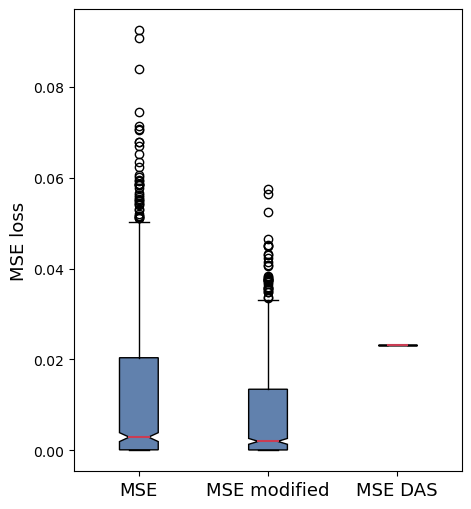

(array([1]), [Text(0, 0, '')])

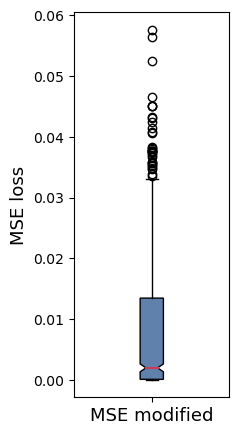

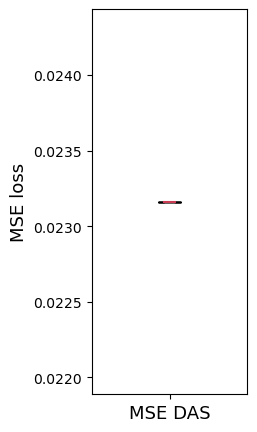

In [262]:
# Zoomed in view about the boxplot of 

# df2 = pd.read_csv('3D_model_prediction_results.csv')


plt.subplots(figsize = (5, 6))
plt.boxplot([df.MSE, df.MSE_modified, df.MSE_modified_das],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE', 'MSE modified', 'MSE DAS'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE modified'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified_das],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE DAS'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)


### Small defect vs large defect

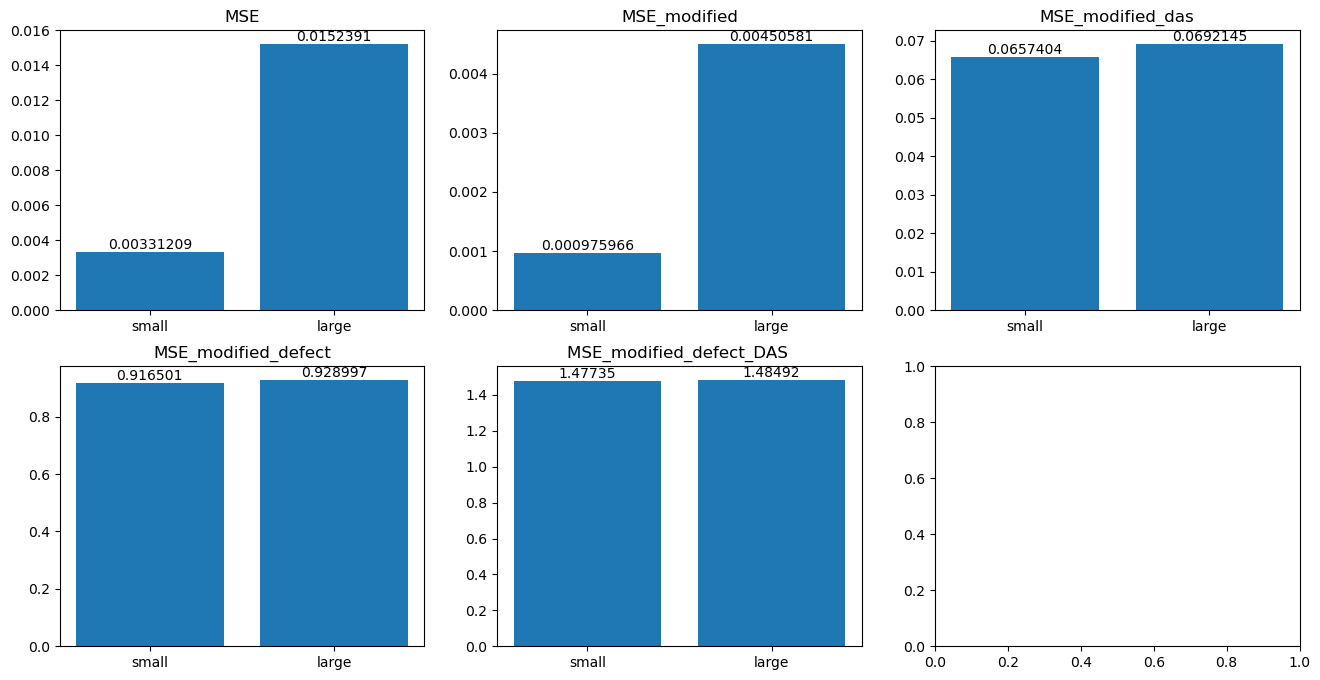

In [66]:
df_small_defect = df[df.defWidth < width_small]
df_s = df_small_defect.describe().loc['mean']

df_large_defect = df[df.defWidth > width_small]
df_l = df_large_defect.describe().loc['mean']

size = ['small', 'large']
fig, ax = plt.subplots(2,3, figsize = [16,8])
ax[0, 0].bar(size, [df_s.MSE, df_l.MSE])
ax[0, 0].set_title('MSE')

for bars in ax[0, 0].containers:
    ax[0, 0].bar_label(bars)

ax[0, 1].bar(size, [df_s.MSE_modified, df_l.MSE_modified])
ax[0, 1].set_title('MSE_modified')

for bars in ax[0, 1].containers:
    ax[0, 1].bar_label(bars)

ax[0, 2].bar(size, [df_s.MSE_modified_das, df_l.MSE_modified_das])
ax[0, 2].set_title('MSE_modified_das')

for bars in ax[0, 2].containers:
    ax[0, 2].bar_label(bars)

ax[1, 0].bar(size, [df_s.MSE_modified_defect, df_l.MSE_modified_defect])
ax[1, 0].set_title('MSE_modified_defect')

for bars in ax[1, 0].containers:
    ax[1, 0].bar_label(bars)

ax[1, 1].bar(size, [df_s.MSE_modified_defect_DAS , df_l.MSE_modified_defect_DAS ])
ax[1, 1].set_title('MSE_modified_defect_DAS ')

for bars in ax[1, 1].containers:
    ax[1, 1].bar_label(bars)

### Identify the low loss characteristic

In [126]:
df = pd.read_csv('2D_model_prediction_results.csv')
df['x_over_y'] = df.defPosx / df.defPosy 

In [133]:
threshold = df_summary.MSE_modified.loc['25%']
df_filter = df[df.MSE_modified <= threshold]
df_stats = df_filter.describe()
df_stats.loc['std'] / df_stats.loc['mean'] * 100

index                      6.518682e+00
defWidth                   7.918868e+01
defHeight                  6.517616e-14
defPosx                   -9.829102e+02
defPosy                    3.514369e+01
defAng                    -2.369023e+03
defAngR                   -2.369023e+03
MSE                        4.626559e+01
MSE_modified               4.864549e+01
MSE_modified_das           5.547198e+00
MSE_modified_defect        7.496395e+00
MSE_modified_defect_DAS    5.774160e+00
x_over_y                  -1.073632e+03
dtype: float64

The threshold is 5.2779064390051644e-05
The threshold is 0.00628330931067465


(-90.0, 90.0)

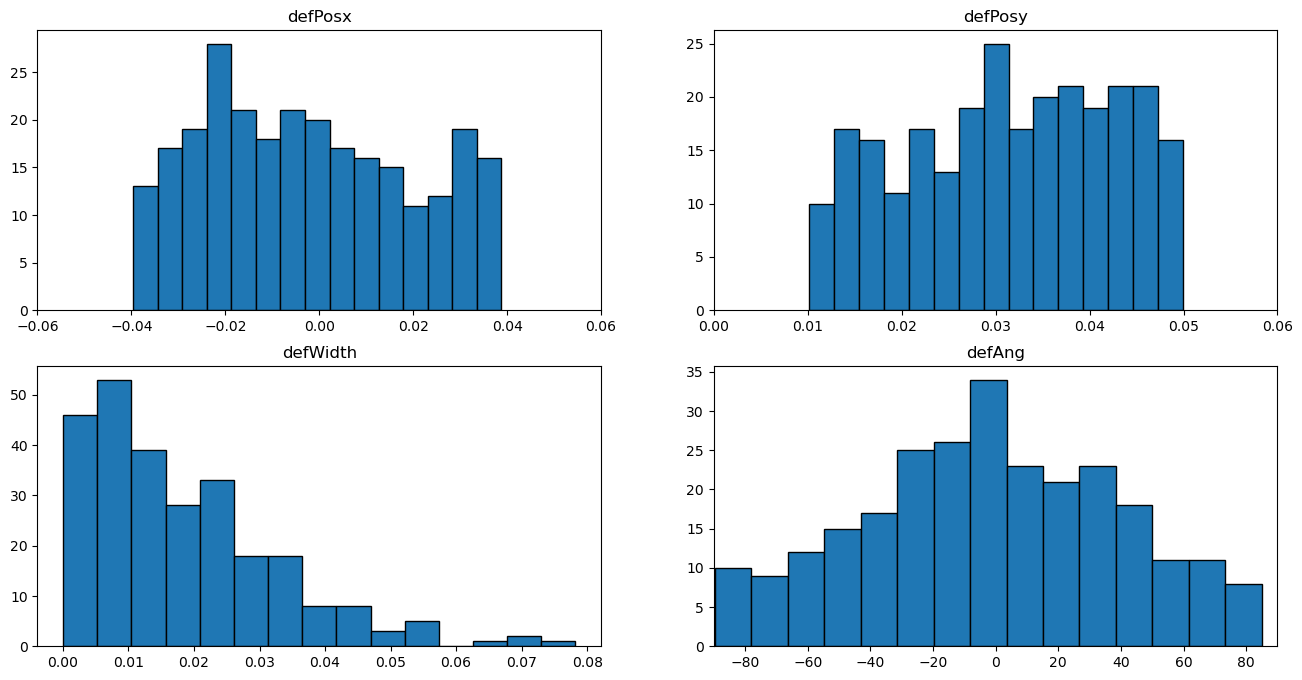

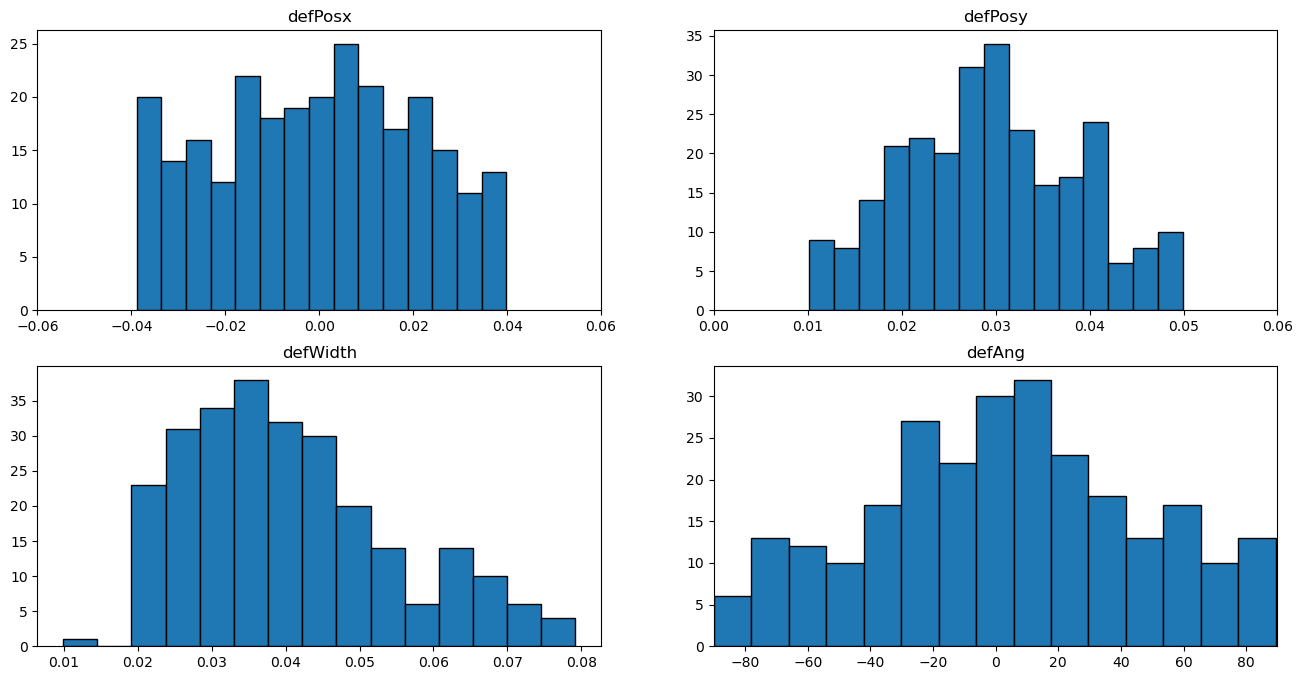

In [122]:

threshold = df_summary.MSE_modified.loc['25%']
bins = 15
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified <= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)

threshold = df_summary.MSE_modified.loc['75%']
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified >= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)


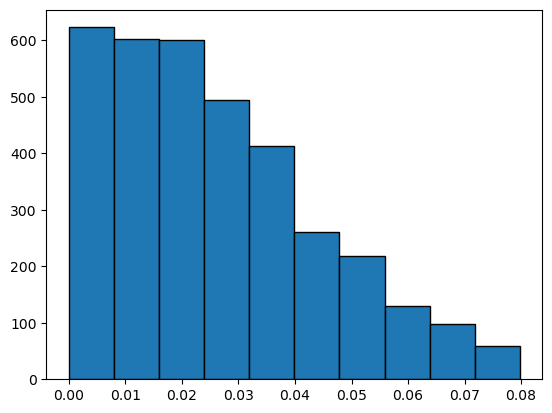

In [28]:
frq, edges = np.histogram(defwidth, 10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x113de0820>,
 'caps': [<matplotlib.lines.Line2D at 0x113de0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113de0550>],
 'medians': [<matplotlib.lines.Line2D at 0x113df03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x113df0670>],
 'means': []}

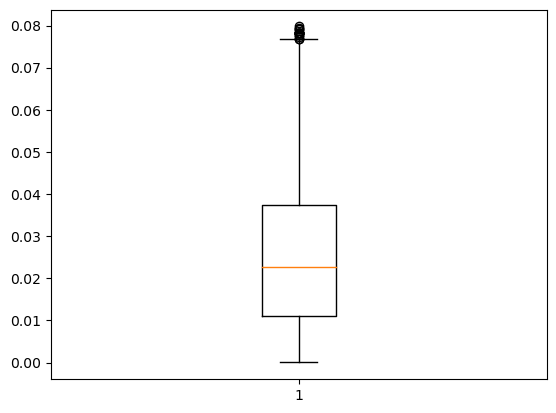

In [29]:
plt.boxplot(defwidth)